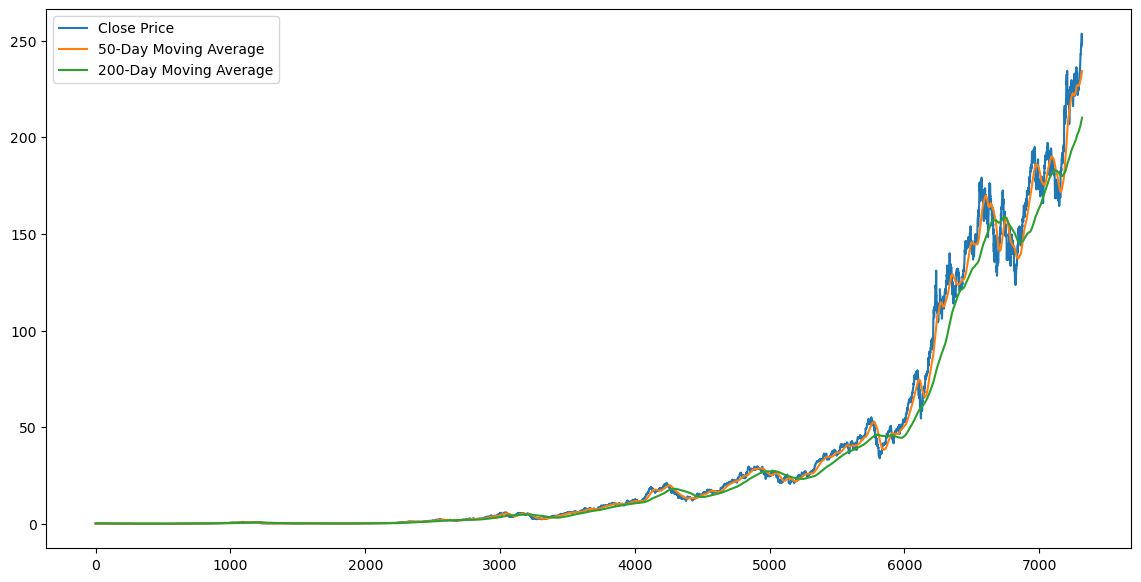

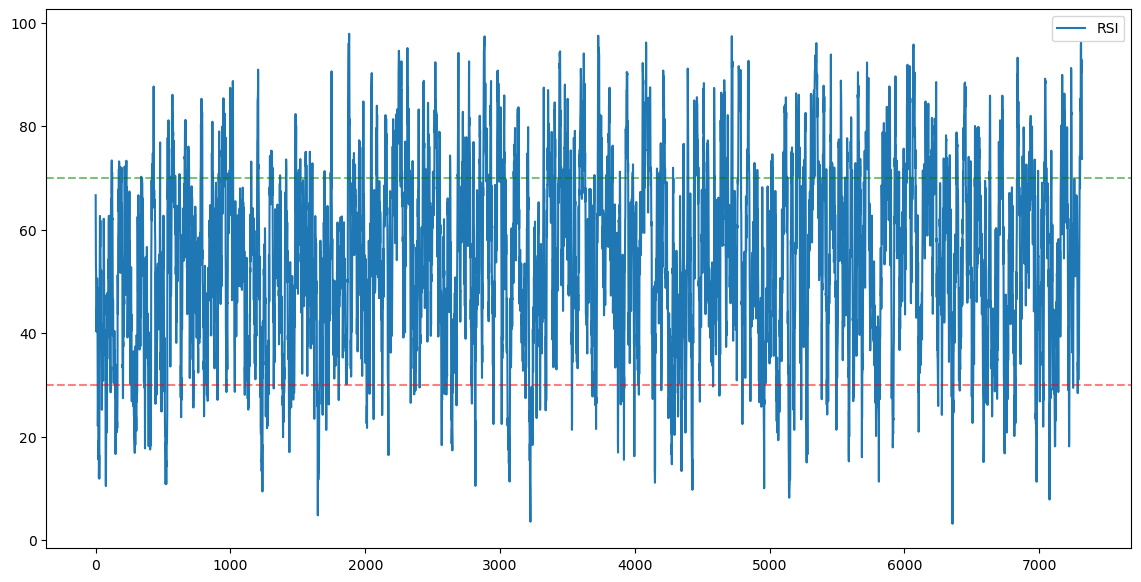

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('final_featuredata.csv')

# Plot stock price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.plot(data['MA200'], label='200-Day Moving Average')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='green')
plt.legend()
plt.show()

0    0.302679
1    0.296560
2    0.301267
3    0.295618
4    0.287145
Name: Close, dtype: float64

Training ARIMA Model...
ARIMA Mean Squared Error: 15399.915062500617


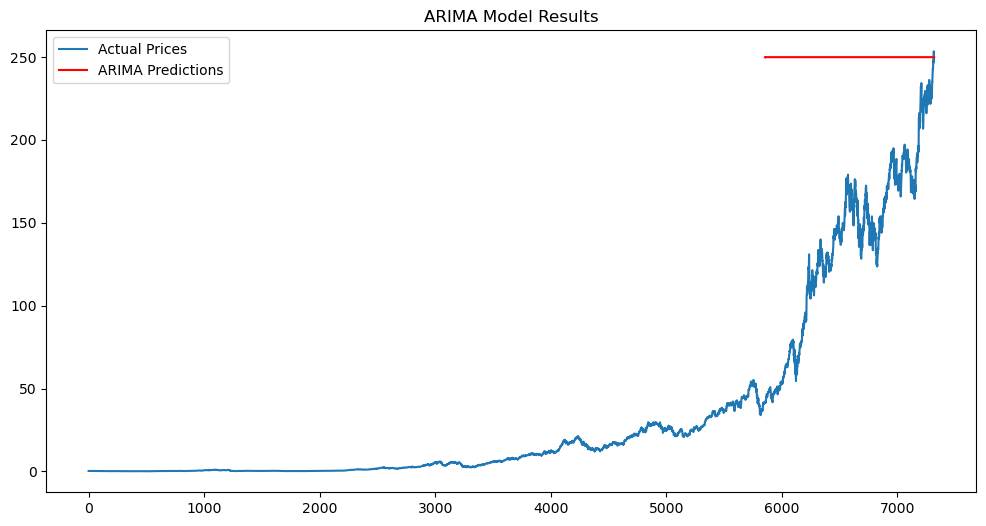

In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Load the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv("final_featuredata.csv")

# Correctly reference the 'Close' column
close_prices = data['Close']

# Example usage: Print the first few rows of the 'Close' column
print(close_prices.head())


# ARIMA Model
print("\nTraining ARIMA Model...")
arima_model = ARIMA(close_prices, order=(5, 1, 0))  # Modify (p, d, q) based on your data
arima_fit = arima_model.fit()

# ARIMA Predictions
train_size = int(len(close_prices) * 0.8)
arima_predictions = arima_fit.forecast(steps=len(close_prices) - train_size)

# Evaluate ARIMA
arima_mse = mean_squared_error(close_prices[train_size:], arima_predictions)
print(f"ARIMA Mean Squared Error: {arima_mse}")

# Plot ARIMA Results
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Actual Prices')
plt.plot(range(train_size, len(close_prices)), arima_predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title("ARIMA Model Results")
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("final_featuredata.csv")

# Select the 'Close' column and normalize
close_prices = data['iClose'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# Prepare training and testing data
train_size = int(len(scaled_close) * 0.8)
train_data, test_data = scaled_close[:train_size], scaled_close[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
print("\nTraining LSTM Model...")
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(units=50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluate LSTM
lstm_mse = mean_squared_error(close_prices[-len(lstm_predictions):], lstm_predictions)
print(f"LSTM Mean Squared Error: {lstm_mse}")

# Plot LSTM Results
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Actual Prices')
plt.plot(range(len(close_prices) - len(lstm_predictions), len(close_prices)), lstm_predictions, label='LSTM Predictions', color='orange')
plt.legend()
plt.title("LSTM Model Results")
plt.show()


ImportError: cannot import name 'Circle' from 'keras.src.losses.losses' (/opt/anaconda3/lib/python3.12/site-packages/keras/src/losses/losses.py)